# Import Libraries and Setup

In [35]:
# manipulate data
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# library to access google trends
from pytrends.request import TrendReq

# custom functions
import google_trends_daily as g

# define request item to "query" google trends "API"
pytrend = TrendReq()

# make pandas types compatibile with matplotlib
pd.plotting.register_matplotlib_converters()

# change pandas plotting backend
pd.options.plotting.backend = "plotly"

# create a dictionary to unpack to update plotly plots settings
# why can't it be as easy as with ggplot...
plotly_dict = dict(
    font_family="Yanone Kaffeesatz",
    template="none",
    title={
        "x": 0.05,
        "xanchor": "left"
    }
)

sns.set_style(style="darkgrid", rc={"axes.facecolor":"0.9","grid.color":"0.8"})
sns.set_palette(palette="deep")
%matplotlib inline

plt.rcParams["figure.figsize"] = [12,6]
plt.rcParams["figure.dpi"] = 100

# An Example Request

Let's try with an example request:

In [2]:
pytrend.build_payload(kw_list=["Mario Draghi"])
pytrend.interest_over_time()

,Mario Draghi,isPartial
date,,
2016-08-21,0,False
2016-08-28,0,False
2016-09-04,1,False
2016-09-11,0,False
2016-09-18,0,False
...,...,...
2021-07-11,2,False
2021-07-18,2,False
2021-07-25,3,False


# Keyword Draghi

## Get the data

In [36]:
draghi_overlap_30 = g.get_daily_trend(
        pytrend,
        keyword="Mario Draghi",
        start="2012-01-01",
        end="2021-05-31",
        overlap=30
    )

draghi_overlap_100 = g.get_daily_trend(
    pytrend,
    keyword="Mario Draghi",
    start="2012-01-01",
    end="2021-05-31",
    overlap=100
)

## Save the data

In [43]:
draghi = (
    pd.merge(
        draghi_overlap_30.drop(["overlap"], axis=1),
        draghi_overlap_100.drop(["overlap"], axis=1),
        left_index=True,
        right_index=True
    )
    .rename(
        columns = {
            "Mario Draghi_x" : "draghi_30",
            "Mario Draghi_y" : "draghi_100"
        }
    )
    .astype("int32")
)

draghi.to_csv("./data/draghi.csv")

# Plotting

In [37]:
draghi_overlap_30.plot(y = "Mario Draghi", kind="line").update_layout(**plotly_dict)

In [38]:
draghi_overlap_100.plot(y = "Mario Draghi", kind="line").update_layout(**plotly_dict)

Text(0.5, 0.98, 'Mario Draghi Google Trends Results, 30 and 100 Days Overlap')

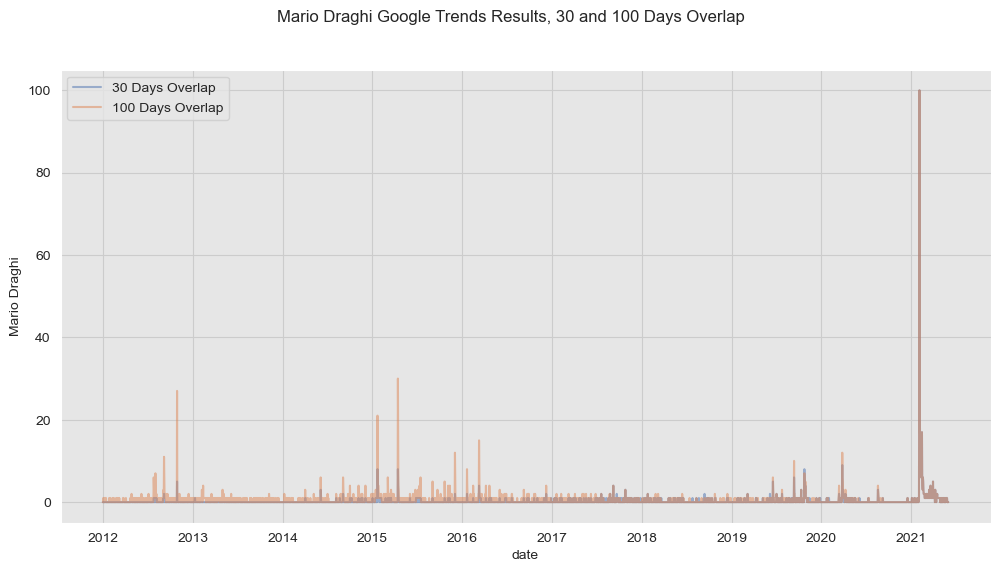

In [41]:
fig, ax = plt.subplots()

sns.lineplot(
    x = draghi_overlap_30.index,
    y = "Mario Draghi",
    label = "30 Days Overlap",
    data = draghi_overlap_30,
    alpha = 0.5,
    ax = ax
)

sns.lineplot(
    x = draghi_overlap_100.index,
    y = "Mario Draghi",
    label = "100 Days Overlap",
    data = draghi_overlap_100,
    alpha = 0.5,
    ax = ax
)

plt.suptitle("Mario Draghi Google Trends Results, 30 and 100 Days Overlap")

fig.savefig("./figures/draghi.png")

# Comparison With Another Keyword: Bitcoin

## Get the Data

In [45]:
bitcoin_overlap_30 = g.get_daily_trend(
    pytrend,
    keyword="Bitcoin",
    start="2012-01-01",
    end="2021-05-31",
    overlap=30
)

bitcoin_overlap_100 = g.get_daily_trend(
    pytrend,
    keyword="Bitcoin",
    start="2012-01-01",
    end="2021-05-31",
    overlap=30
)

## Plotting

In [46]:
bitcoin_overlap_30.plot(y = "Bitcoin").update_layout(**plotly_dict)

In [47]:
bitcoin_overlap_100.plot(y = "Bitcoin").update_layout(**plotly_dict)

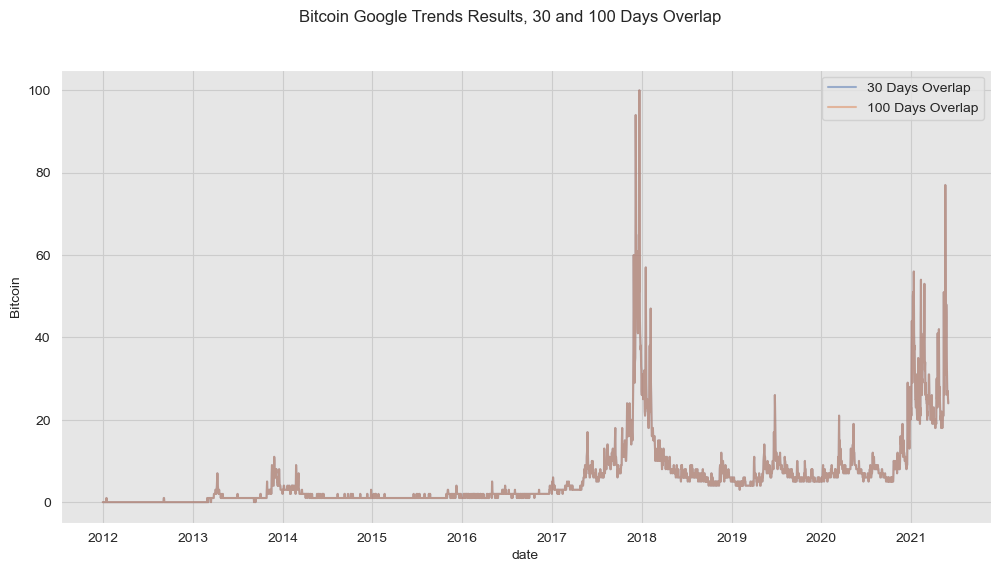

In [48]:
fig, ax = plt.subplots()

sns.lineplot(
    x = bitcoin_overlap_30.index,
    y = "Bitcoin",
    label = "30 Days Overlap",
    data = bitcoin_overlap_30,
    alpha = 0.5,
    ax = ax
)

sns.lineplot(
    x = bitcoin_overlap_100.index,
    y = "Bitcoin",
    label = "100 Days Overlap",
    data = bitcoin_overlap_100,
    alpha = 0.5,
    ax = ax
)

plt.suptitle("Bitcoin Google Trends Results, 30 and 100 Days Overlap")

fig.savefig("./figures/bitcoing.png")

## Save the data

In [49]:
bitcoin = (
    pd.merge(
        bitcoin_overlap_30.drop(["overlap"], axis=1),
        bitcoin_overlap_100.drop(["overlap"], axis=1),
        left_index=True,
        right_index=True
    )
    .rename(
        columns = {
            "Bitcoin_x" : "bitcoin_30",
            "Bitcoin_y" : "bitcoin_100"
        }
    )
)

bitcoin.to_csv("./data/bitcoin.csv")

# One Last Keyword: Christine Lagarde

In [52]:
lagarde_30 = g.get_daily_trend(
    pytrend,
    keyword="Christine Lagarde",
    start="2012-01-01",
    end="2021-05-31",
    overlap=30
)

lagarde_100 = g.get_daily_trend(
    pytrend,
    keyword="Christine Lagarde",
    start="2012-01-01",
    end="2021-05-31",
    overlap=100
)

In [51]:
lagarde_30.plot().update_layout(**plotly_dict)

In [53]:
lagarde_100.plot().update_layout(**plotly_dict)

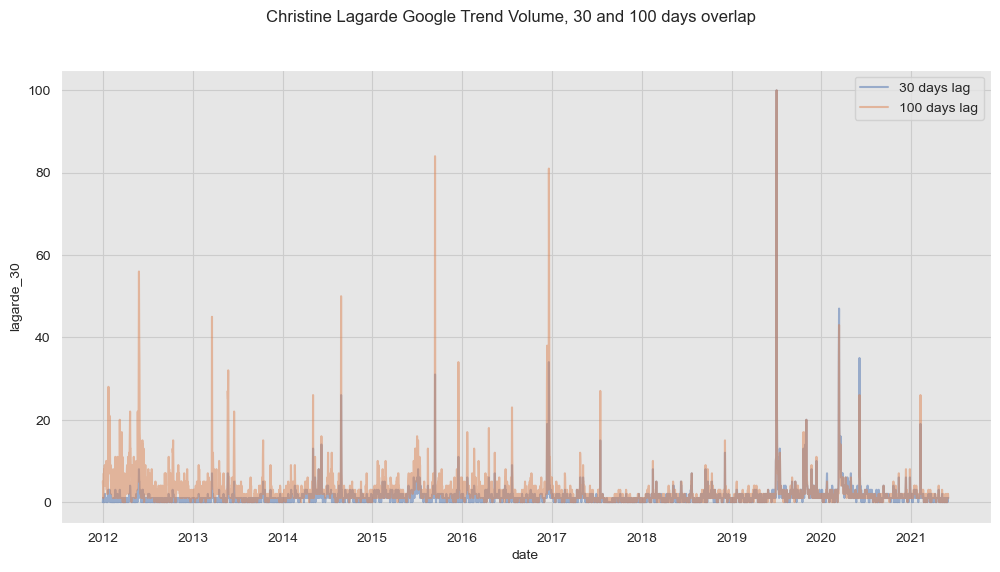

In [54]:
fig, ax = plt.subplots()

sns.lineplot(
    x=lagarde.index,
    y="lagarde_30",
    data = lagarde,
    alpha=0.5,
    label = "30 days lag",
    ax = ax
)


sns.lineplot(
    x=lagarde.index,
    y="lagarde_100",
    data = lagarde,
    alpha=0.5,
    label = "100 days lag",
    ax = ax
)

plt.suptitle("Christine Lagarde Google Trend Volume, 30 and 100 days overlap")

fig.savefig("./figures/lagarde.png")

## Save the Data

In [26]:
lagarde = (
    pd.merge(
        lagarde_30.drop(["overlap"], axis=1),
        lagarde_100.drop(["overlap"], axis=1),
        left_index=True,
        right_index=True
    )
    .rename(
        columns = {
            "Christine Lagarde_x" : "lagarde_30",
            "Christine Lagarde_y" : "lagarde_100"
        }
    )
)

lagarde.to_csv("./data/lagarde.csv")